<a href="https://colab.research.google.com/github/TI1307/DM_Project/blob/main/notebooks/cleaning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# Data Preprocessing and cleaning


# Data Quality **Issues**


In [974]:
import pandas as pd
import matplotlib_inline
from datetime import datetime
import unicodedata
import re


In [975]:
########    LIBRARY INVENTORY TABLE      ###############
LIBRARY_INVENTORY_REAL= pd.read_excel("../data/LIBRARY INVENTORY.xlsx")
print ('Number of instance in the LIBRARY INVENTORY' , (LIBRARY_INVENTORY_REAL.shape[0]))
print ('Number of attributes in the LIBRARY INVENTORY' , (LIBRARY_INVENTORY_REAL.shape[1]))
print(LIBRARY_INVENTORY_REAL.head(3))
print ('-'*20)
########  LIBRARY_CARALOGUE TABLE     ###############
LIBRARY_CATALOGUE_REAL= pd.read_excel("../data/library catalogue.xlsx")
print ('Number of instance in the LIBRARY CARALOGUE' , (LIBRARY_CATALOGUE_REAL.shape[0]))
print ('Number of attributes in the LIBRARY INVENTORY' , (LIBRARY_CATALOGUE_REAL.shape[1]))
print ('-'*20)
#######    BORROWING TABLE             ###########################
BORROWINGS_REAL= pd.read_excel("../data/Borrowings .xlsx")
print ('Number of instance in the BORROWINGS TABLE ' , (BORROWINGS_REAL.shape[0]))
print ('Number of attributes in the BORROWINGS TABLE ' , (BORROWINGS_REAL.shape[1]))
print(BORROWINGS_REAL.head(3))

Number of instance in the LIBRARY INVENTORY 4255
Number of attributes in the LIBRARY INVENTORY 16
  N° inventaire Date de réception  \
0         62504               NaT   
1        111442               NaT   
2             1        2021-12-19   

                                               Titre            Auteur  \
0  Programmation mathématique : théorie et algori...    Minoux, Michel   
1  Calcul des probabilités : cours, exercices et ...  Foata, Dominique   
2            Calcul DIfferentiel et Integral Tome 01       Piskounov,N   

                                  Editeur  Date d'édition Lieu d'édition  \
0                               Lavoisier          2008.0          Paris   
1                                   Dunod          2012.0          Paris   
2  Office des Publications Universitaires          2006.0        algerie   

  Edition Mode d'acquisition        Statut Fournisseur             N° achat  \
0  2e éd.             Passif           NaN         NaN                  

### Data Copy


In [976]:
LIBRARY_INVENTORY =LIBRARY_INVENTORY_REAL.copy()
LIBRARY_CATALOGUE =LIBRARY_CATALOGUE_REAL.copy()
BORROWINGS =BORROWINGS_REAL.copy()




## **Cleaning Functions**


### **Missing Values**


In [977]:
# gives a summery of missing values
def missing_values_summary(df):
  missing_count = df.isnull().sum()
  missing_percent = (missing_count/ len(df))*100

  summery = pd.DataFrame({
      'missing_count': missing_count,
      'missing_percent': missing_percent
  })
  summery = summery.sort_values('missing_percent', ascending=False)
  return summery
import pandas as pd

def handle_missing_values(df, strategy_dict):
    """
    Fill missing values in a DataFrame according to a strategy dictionary.

    Parameters:
        df (pd.DataFrame): Input dataframe
        strategy_dict (dict): {column_name: strategy}, where strategy can be:
            - 'mean'   → fill numeric with mean
            - 'median' → fill numeric with median
            - 'mode'   → fill categorical with mode
            - value    → fill with this value directly

    Returns:
        pd.DataFrame: DataFrame with missing values handled
    """
    for col, strategy in strategy_dict.items():
        if strategy == 'mean':
            df[col] = df[col].fillna(df[col].mean())
        elif strategy == 'median':
            df[col] = df[col].fillna(df[col].median())
        elif strategy == 'mode':
            df[col] = df[col].fillna(df[col].mode()[0])
        else:
            # Use the provided value
            df[col] = df[col].fillna(strategy)
    return df




### **Outliers**


### **Duplicate Data**


In [978]:
def checkDuplicat (df, table_name,  keep=False):
    dup=df.duplicated()
    dup_count=dup.sum()
    print(f'Number of duplicate rows in {table_name} table is = %d' % (dup_count))
    if dup_count > 0:
      print (f'\n Duplicare row in the table {table_name}:')
      dup_rows=df[dup]
      for idx in dup_rows.index:
          print(f'\n row number :{idx}')
          print(df.loc[idx])
          print('-' * 50)




### **Aggregation**


### **Sampling**


### **Discretization**


### Feature Engineering


In [979]:
# Dates formating 
def format_dates(df, date_columns):
    for col in date_columns:
        df[col] = pd.to_datetime(df[col], errors='coerce')
    return df

def borrowing_duration(df,Date_prêt,Date_retour):
    format_dates(df, [Date_prêt,Date_retour])
    df['borrowing duration']=(df[Date_retour]-df[Date_prêt]).dt.days
    return 
# Clean titles (remove extra spaces, lowercase for matching)

def clean_title(title):
    """Normalize title for matching"""
    if pd.isna(title):
        return None
    title = str(title).strip().upper()
    title = unicodedata.normalize('NFKD', title)
    title = ''.join(c for c in title if not unicodedata.combining(c))
    title = re.sub(r'[^\w\s]', ' ', title)
    title = ' '.join(title.split())
    return title
# Normalize titles
BORROWINGS['Titre_clean'] = BORROWINGS['Titre'].apply(clean_title) 
LIBRARY_CATALOGUE['Titre_clean'] = LIBRARY_CATALOGUE['Titre'].apply(clean_title)
LIBRARY_INVENTORY['Titre_clean'] = LIBRARY_INVENTORY['Titre'].apply(clean_title)

# Remove extra spaces in column names
BORROWINGS.columns = BORROWINGS.columns.str.strip()
LIBRARY_INVENTORY.columns = LIBRARY_INVENTORY.columns.str.strip()
LIBRARY_CATALOGUE.columns = LIBRARY_CATALOGUE.columns.str.strip()
# Convert to string, strip spaces, and uppercase
BORROWINGS['Cote'] = BORROWINGS['Cote'].astype(str).str.strip().str.upper()
LIBRARY_CATALOGUE['Cote'] = LIBRARY_CATALOGUE['Cote'].astype(str).str.strip().str.upper()
LIBRARY_INVENTORY['Cote'] = LIBRARY_INVENTORY['Cote'].astype(str).str.strip().str.upper()


# **Borowing Table**


**Table info**


In [980]:
# Cleaningg the borrowing table
# table name : BORROWINGS

print ('Number of instance in the BORROWINGS TABLE ' , (BORROWINGS.shape[0]))
print ('Number of attributes in the BORROWINGS TABLE ' , (BORROWINGS.shape[1]))
print(BORROWINGS.columns)

Number of instance in the BORROWINGS TABLE  422
Number of attributes in the BORROWINGS TABLE  12
Index(['Numéro', 'Cote', 'Titre', 'Type de document', 'N° lecteur', 'Nom',
       'Prénom', 'Catégorie', 'Date prêt', 'Date retour', 'Date réservation',
       'Titre_clean'],
      dtype='object')


**Missing Values & Check Duplicate**


In [981]:
# summery about missing values :
print(missing_values_summary(BORROWINGS))

#check duplicate :
checkDuplicat(BORROWINGS , "BORROWINGS TABLE ")

                  missing_count  missing_percent
Date réservation            414        98.104265
Numéro                        0         0.000000
Cote                          0         0.000000
Titre                         0         0.000000
Type de document              0         0.000000
N° lecteur                    0         0.000000
Nom                           0         0.000000
Prénom                        0         0.000000
Catégorie                     0         0.000000
Date prêt                     0         0.000000
Date retour                   0         0.000000
Titre_clean                   0         0.000000
Number of duplicate rows in BORROWINGS TABLE  table is = 0


**Hundle Missing Values**


In [982]:
# we drop Date réservation because more then 60% (98%) of its value is missing 
BORROWINGS=BORROWINGS.drop(['Date réservation'],axis=1) 

**Outliers**:

First we convert the dates from string to date type , then calculate borrowing duration ( Date_retour- date_pret) , to get numurical values so we can detect outliers using box blot


In [983]:
borrowing_duration(BORROWINGS,'Date prêt','Date retour')
BORROWINGS = BORROWINGS.drop(['Date prêt', 'Date retour'], axis=1)
print(BORROWINGS.head())

   Numéro           Cote                                              Titre  \
0    1000        515 MON      Exercices corrigés d'analyse : 1ère année LMD   
1    1005      510.BAL/1  Exercices d'algèbre et d'analyse : 154 exercic...   
2    1006      510.BAL/2  Exercices d'algèbre et d'analyse : 154 exercic...   
3    1007      510.BAL/3  Exercices d'algèbre et d'analyse : 154 exercic...   
4    1009  518.107.BAY/1  Exercices et problèmes d'algorithmique : 144 é...   

  Type de document N° lecteur        Nom       Prénom    Catégorie  \
0            Livre    5817912    MAMECHE       FERIEL  1 ére ANNEE   
1            Livre    5754033    fourali        malak  1 ére ANNEE   
2            Livre    5113394     SEHALI         MAYA  1 ére ANNEE   
3            Livre    6092419  kheddaoui      thiziri  1 ére ANNEE   
4            Livre    8354464      GACEB  RIHAM BAHIA  3 ème ANNEE   

                                         Titre_clean  borrowing duration  
0        EXERCICES CORRIGES D

<Axes: >

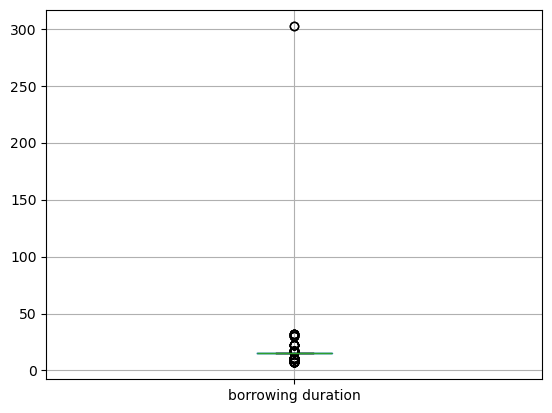

In [984]:
BORROWINGS.boxplot(column='borrowing duration')

In [985]:
BORROWINGS[BORROWINGS['borrowing duration']>250]

,Numéro,Cote,Titre,Type de document,N° lecteur,Nom,Prénom,Catégorie,Titre_clean,borrowing duration
325,3731,006.31 SUT/1,"Reinforcement Learning, An introduction",Livre,en01,boulmarka,aissa,Enseignant,REINFORCEMENT LEARNING AN INTRODUCTION,302
359,3887,005.74 COR,"Database Systems : Design, Implementation, & M...",Livre,en01,boulmarka,aissa,Enseignant,DATABASE SYSTEMS DESIGN IMPLEMENTATION MANAGEMENT,302


# **LIBRARY INVENTORY**


**Table info**


In [986]:
# Cleaningg the LIBRARY INVENTORY table
# table name : LIBRARY_INVENTORY

print ('Number of instance in the LIBRARY_INVENTORY TABLE ' , (LIBRARY_INVENTORY.shape[0]))
print ('Number of attributes in the LIBRARY_INVENTORY TABLE ' , (LIBRARY_INVENTORY.shape[1]))
print(LIBRARY_INVENTORY.columns)

Number of instance in the LIBRARY_INVENTORY TABLE  4255
Number of attributes in the LIBRARY_INVENTORY TABLE  17
Index(['N° inventaire', 'Date de réception', 'Titre', 'Auteur', 'Editeur',
       'Date d'édition', 'Lieu d'édition', 'Edition', 'Mode d'acquisition',
       'Statut', 'Fournisseur', 'N° achat', 'Prix', 'Cote', 'Localisation',
       'Observation', 'Titre_clean'],
      dtype='object')


**Missing Values & Check Duplicate**


In [987]:
# summery about missing values :
print(missing_values_summary(LIBRARY_INVENTORY))

#check duplicate :
checkDuplicat(LIBRARY_INVENTORY, "LIBRARY_INVENTORY")

                    missing_count  missing_percent
Observation                  4250        99.882491
Prix                         3397        79.835488
Fournisseur                  3353        78.801410
N° achat                     3353        78.801410
Date de réception            3227        75.840188
Edition                      3179        74.712103
Editeur                      1204        28.296122
Lieu d'édition                429        10.082256
Date d'édition                220         5.170388
Auteur                        105         2.467685
Localisation                   46         1.081081
Statut                         40         0.940071
N° inventaire                   0         0.000000
Mode d'acquisition              0         0.000000
Cote                            0         0.000000
Titre                           0         0.000000
Titre_clean                     0         0.000000
Number of duplicate rows in LIBRARY_INVENTORY table is = 0


Here we only have the columns : " Date d'édition " , " Auteur " , " Cote " , "Localisation" , " Statut " , " N° inventaire " , " Titre ","Mode d'acquisition" . we can use theme the others are more then 60% empty


In [988]:
LIBRARY_INVENTORY = LIBRARY_INVENTORY.loc[:, (LIBRARY_INVENTORY.isnull().sum() / len(LIBRARY_INVENTORY)) * 100 <= 60]

**Outliers**


<Axes: >

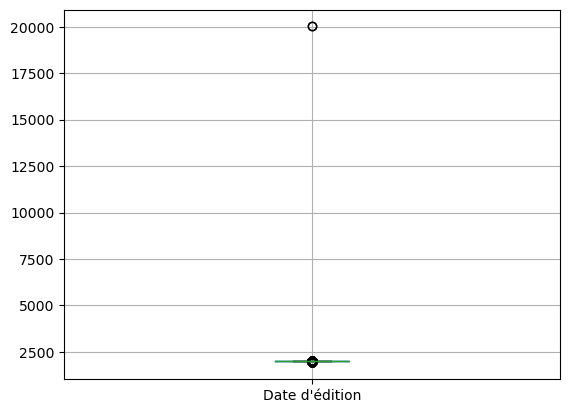

In [989]:


LIBRARY_INVENTORY["Date d'édition"] = pd.to_numeric(LIBRARY_INVENTORY["Date d'édition"], errors="coerce")
LIBRARY_INVENTORY.boxplot(column=["Date d'édition"])

In [990]:
LIBRARY_INVENTORY[LIBRARY_INVENTORY["Date d'édition"]>10000]

,N° inventaire,Titre,Auteur,Editeur,Date d'édition,Lieu d'édition,Mode d'acquisition,Statut,Cote,Localisation,Titre_clean
33,1027,Mathématiques : méthodes et exercices : PCSI-PTSI,"Marie Monier, Jean",NaN,20011.0,paris,Passif,Prêt externe,510 MON/1,NaN,MATHEMATIQUES METHODES ET EXERCICES PCSI PTSI
34,1028,Mathématiques : méthodes et exercices : PCSI-PTSI,"Marie Monier, Jean",NaN,20011.0,paris,Passif,Prêt externe,510 MON/2,ENSIA,MATHEMATIQUES METHODES ET EXERCICES PCSI PTSI


Those are Prototypes , so we need to handle them with a general rule , we will assume that Valid publication years are between 1000 and current year . we replace the nonvalid year , with the mode year per title , else we make it Nan


In [991]:
# Define valid year range
current_year = datetime.now().year
invalid_mask = (
    (LIBRARY_INVENTORY["Date d'édition"] < 1000) |
    (LIBRARY_INVENTORY["Date d'édition"] > current_year)
)
# Compute MODE year per title (ignoring invalid years)
title_year_mode = (
    LIBRARY_INVENTORY.loc[~invalid_mask]
    .groupby("Titre_clean")["Date d'édition"]
    .agg(lambda x: x.mode().iloc[0] if not x.mode().empty else pd.NA)
)

# Replace invalid years using title mode
LIBRARY_INVENTORY.loc[invalid_mask, "Date d'édition"] = (
    LIBRARY_INVENTORY.loc[invalid_mask, "Titre_clean"]
    .map(title_year_mode)
)

C:\Users\SURFACE\AppData\Local\Temp\ipykernel_9436\298556226.py:15: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '[nan nan]' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  LIBRARY_INVENTORY.loc[invalid_mask, "Date d'édition"] = (


# **LIBRARY_CATALOGUE**


**table info**


In [992]:
# Cleaningg the LIBRARY_CATALOGUE table
# table name : LIBRARY_CATALOGUE

print ('Number of instance in the LIBRARY_CATALOGUE TABLE ' , (LIBRARY_CATALOGUE.shape[0]))
print ('Number of attributes in the LIBRARY_CATALOGUE TABLE ' , (LIBRARY_CATALOGUE.shape[1]))
print(LIBRARY_CATALOGUE.columns)

Number of instance in the LIBRARY_CATALOGUE TABLE  620
Number of attributes in the LIBRARY_CATALOGUE TABLE  6
Index(['ISBN, ISSN...', 'Titre', 'Auteur', 'Cote', 'Nbr. Exp.', 'Titre_clean'], dtype='object')


**Missing Values & check Duplicate**


In [993]:
# summery about missing values :
print(missing_values_summary(LIBRARY_CATALOGUE))

#check duplicate :
checkDuplicat(LIBRARY_CATALOGUE, "LIBRARY_CATALOGUE")

               missing_count  missing_percent
Nbr. Exp.                104        16.774194
ISBN, ISSN...             42         6.774194
Auteur                    17         2.741935
Titre                      0         0.000000
Cote                       0         0.000000
Titre_clean                0         0.000000
Number of duplicate rows in LIBRARY_CATALOGUE table is = 0


all of those columns we can not hundle the missing values , except for the cote , we can use later some model to predict the category from the title , this will help us in clustering


**Outliers**


<Axes: >

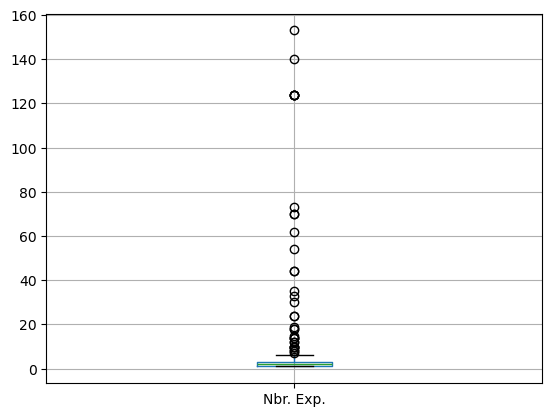

In [994]:
LIBRARY_CATALOGUE.boxplot(column='Nbr. Exp.')

In [995]:
LIBRARY_CATALOGUE[LIBRARY_CATALOGUE['Nbr. Exp.']>120]

,"ISBN, ISSN...",Titre,Auteur,Cote,Nbr. Exp.,Titre_clean
200,9789961020661,DE MES CAHIERS D’ANALYSE…SUITES NUMERIQUES : C...,Mohammed hazi,515.2 HAZ/100,124.0,DE MES CAHIERS D ANALYSE SUITES NUMERIQUES COU...
201,9789961020678,De mes cahiers d’analyse… fonctions réelles d’...,Hazi Mohammed,515.8 HAZ/100,124.0,DE MES CAHIERS D ANALYSE FONCTIONS REELLES D U...
202,9789961020685,Fonctions réelles d'une variable réelle : déri...,Hazi Mohammed,515.8 HAZ/100,153.0,FONCTIONS REELLES D UNE VARIABLE REELLE DERIVA...
203,9789961020692,De mes cahiers d’analyse.. Intégrale de Rieman...,Hazi Mohammed,515 HAZ/100,124.0,DE MES CAHIERS D ANALYSE INTEGRALE DE RIEMANN ...
339,9789961020708,De mes cahiers d’analyse… équations différenti...,Hazi Mohammed,515.3 HAZ/1,124.0,DE MES CAHIERS D ANALYSE EQUATIONS DIFFERENTIE...
354,9789961019306,TOUT SUR R : ENSEMBLE DES NOMBRES REELS STRUCT...,Mohammed hazi,512.55,124.0,TOUT SUR R ENSEMBLE DES NOMBRES REELS STRUCTUR...
355,9789961020715,FONCTIONS DE PLUSIEURS VARIABLES RELLES : IMIT...,Mohammed hazi,NAN,140.0,FONCTIONS DE PLUSIEURS VARIABLES RELLES IMITES...


# **Merge Tables**


**data cleaning and preparation for text matching**

handling the Title column in the three tables because it’s the common column used for merging


In [996]:
# Clean titles (remove extra spaces, lowercase for matching)
def clean_title(title):
    return str(title).strip().lower()

BORROWINGS['Titre_clean'] = BORROWINGS['Titre'].apply(clean_title) 
LIBRARY_CATALOGUE['Titre_clean'] = LIBRARY_CATALOGUE['Titre'].apply(clean_title)
LIBRARY_INVENTORY['Titre_clean'] = LIBRARY_INVENTORY['Titre'].apply(clean_title)
#Stores the result in a new column called Titre_clean, which is used for merging.


**_Aggregation_**

For the Inventory table, instead of having multiple rows for the same book, we grouped them into a single row by adding a Total_copies column and storing all copy statuses in an array.


In [997]:
# # List all columns in LIBRARY_INVENTORY
# all_columns = LIBRARY_INVENTORY.columns.tolist()

# # Columns you want to aggregate specially
# agg_columns = {
#     'N° inventaire': 'count',  
#     'Date de réception': 'min',
#     'Statut': lambda x: ', '.join(x.dropna().unique())
# }

# # For other columns, just take the first value 
# for col in all_columns:
#     if col not in agg_columns and col != 'Titre_clean':
#         agg_columns[col] = 'first'  

# # Perform aggregation
# inventory_summary = LIBRARY_INVENTORY.groupby('Titre_clean').agg(agg_columns).rename(columns={
#     'N° inventaire': 'Total_Copies',
#     'Date de réception': 'First_Acquisition',
#     'Statut': 'Copy_Statuses'
# }).reset_index()

# print("Length before aggregation:", len(LIBRARY_INVENTORY))
# print("Length after aggregation:", len(inventory_summary))
# print(inventory_summary.columns)
# print (LIBRARY_INVENTORY.columns)


**_Merge Tables_**


In [998]:
# # Step 1: Keep only FIRST occurrence of each title in catalog
# catalog_unique = LIBRARY_CATALOGUE.drop_duplicates(subset=['Titre_clean'], keep='first')
# print(f"Catalog: {len(LIBRARY_CATALOGUE)} → {len(catalog_unique)} unique titles")

# #Merge borrowing with catalog (by Title  )
# merged_1 = pd.merge(
#     BORROWINGS,
#     catalog_unique ,
#     how='left',
#     left_on='Titre_clean' , 
#     right_on='Titre_clean', 
#     suffixes=('_borrowings', '_catalogue'))
# #Merge result with inventory (by Title)
# final_merged = pd.merge(
#     merged_1,
#     inventory_summary,
#     how='left',
#     left_on='Titre_clean', 
#     right_on='Titre_clean', 
#     suffixes=('_merged1', '_inventory'))

# #clean up columns
# #becuae Titre exist in the three tables Pandas automatically adds suffixes to distinguish them so we need to remove them .
# if 'Titre_catalogue' in final_merged.columns:
#   final_merged.drop('Titre_catalogue', axis=1 , inplace=True)
# if 'Titre_inventory' in final_merged.columns:
#   final_merged.drop('Titre_inventory', axis=1 , inplace=True)

# #keep original title from borrowing table
# final_merged.rename (columns={'Titre_borrowings' :'Titre' }, inplace=True)

# #remove the titre_clean column
# final_merged.drop('Titre_clean' , axis=1 , inplace=True)
# print(f"Original borrowing rows: {len(BORROWINGS)}")
# print(f"Final merged rows: {len(final_merged)}")
# print(f"Columns: {list(final_merged.columns)}")

# # Check for unmatched books
# #Check borrowings not in catalog:
# unmatched_borrowings = final_merged[final_merged['ISBN, ISSN...'].isna()]
# print(f"Borrowings without catalog match: {len(unmatched_borrowings)}")
# #Check borrowings not in inventory:
# unmatched_inventory = final_merged[final_merged['Total_Copies'].isna()]
# print(f"Borrowings without inventory match: {len(unmatched_inventory)}")

**_Save Final Table_**


In [999]:
# # Save to CSV
# final_merged.to_csv('../data/unified_library_data.csv', index=False, encoding='utf-8')

# # Save to Excel
# final_merged.to_excel('../data/unified_library_data.xlsx', index=False)

# # print(" Merge complete!")
# print(f"Final dataset: {len(final_merged)} rows × {len(final_merged.columns)} columns")
# print(f"File saved: unified_library_data.csv")
# UNIFIED_LIBRARY_DATA = pd.read_excel ("unified_library_data.xlsx")

# checkDuplicat(UNIFIED_LIBRARY_DATA, "LIBRARY_CATALOGUE")

### Merge the Catalogue and Borrow


In [1000]:
# ============================================================================
# PART 1: CHECK MATCH BETWEEN CATALOGUE AND BORROWINGS
# ============================================================================


print("=" * 80)
print("CHECKING MATCH BETWEEN CATALOGUE AND BORROWINGS")
print("=" * 80)


# Get unique titles
borrowing_titles = set(BORROWINGS['Titre_clean'].unique())
catalogue_titles = set(LIBRARY_CATALOGUE['Titre_clean'].unique())

# Find matches
matching_titles = borrowing_titles & catalogue_titles
missing_titles = borrowing_titles - catalogue_titles

# Results
print(f"\n Unique titles borrowed: {len(borrowing_titles)}")
print(f" Unique titles in catalogue: {len(catalogue_titles)}")
print(f" Matching titles: {len(matching_titles)} ({100*len(matching_titles)/len(borrowing_titles):.1f}%)")
print(f" Missing from catalogue: {len(missing_titles)} ({100*len(missing_titles)/len(borrowing_titles):.1f}%)")

if len(missing_titles) > 0:
    print(f"\nSample missing titles (first 5):")
    for title in sorted(list(missing_titles))[:5]:
        sample = BORROWINGS[BORROWINGS['Titre_clean'] == title].iloc[0]
        count = len(BORROWINGS[BORROWINGS['Titre_clean'] == title])
        print(f"  - {sample['Titre'][:60]} (borrowed {count} times)")

print("=" * 80)

CHECKING MATCH BETWEEN CATALOGUE AND BORROWINGS

 Unique titles borrowed: 133
 Unique titles in catalogue: 617
 Matching titles: 112 (84.2%)
 Missing from catalogue: 21 (15.8%)

Sample missing titles (first 5):
  - 400 exercices corrigés d'algèbre avec rappels de cours pour  (borrowed 1 times)
  - Algebre 1 : rappels de cours et exercices avec solutions (borrowed 55 times)
  - Algorithmique : cours et exercices corrigés (borrowed 4 times)
  - Algèbre 1re année (borrowed 5 times)
  - Algèbre : cours et exercices avec solutions (borrowed 1 times)


In [1001]:
# ============================================================================
# PART 2: AGGREGATE BORROWINGS AND MERGE WITH LIBRARY_CATALOGUE
# ============================================================================

def normalize_text(text):
    text = str(text).strip().upper()
    text = unicodedata.normalize('NFKD', text)
    text = ''.join(c for c in text if not unicodedata.combining(c))
    return text

print("\n" + "=" * 80)
print("AGGREGATING BORROWINGS")
print("=" * 80)

# Map borrower categories
BORROWINGS['Catégorie_norm'] = BORROWINGS['Catégorie'].apply(normalize_text)
category_map = {
    '1 ERE ANNEE': '1y', '2 EME ANNEE': '2y', '3 EME ANNEE': '3y',
    '4 EME ANNEE': '4y', '5 EME ANNEE': '5y', 'ENSEIGNANT': 'teacher'
}
BORROWINGS['borrower_group'] = BORROWINGS['Catégorie_norm'].map(category_map)
BORROWINGS = BORROWINGS[BORROWINGS['borrower_group'].notna()]

# Process semester
BORROWINGS['borrowing duration'] = pd.to_numeric(BORROWINGS['borrowing duration'], errors='coerce')
median_duration = BORROWINGS['borrowing duration'].median()
BORROWINGS['borrowing duration'] = BORROWINGS['borrowing duration'].fillna(median_duration)
BORROWINGS['Semester'] = BORROWINGS['borrowing duration'].apply(lambda x: 1 if x <= median_duration else 2)

# Add missing books to LIBRARY_CATALOGUE
missing_books = []
for title in missing_titles:
    sample = BORROWINGS[BORROWINGS['Titre_clean'] == title].iloc[0]
    missing_books.append({
        'Titre': sample['Titre'],
        'Titre_clean': title,
        'Cote': sample['Cote'] if 'Cote' in sample else f"MISSING_{len(missing_books)}",
        'Source': 'Added from borrowings'
    })

if len(missing_books) > 0:
    missing_df = pd.DataFrame(missing_books)
    LIBRARY_CATALOGUE = pd.concat([LIBRARY_CATALOGUE, missing_df], ignore_index=True)
    print(f" Added {len(missing_books)} missing books to LIBRARY_CATALOGUE")

# Aggregate by borrower type
borrow_agg = BORROWINGS.groupby(['Titre_clean', 'borrower_group']).size().unstack(fill_value=0)
borrower_columns = ['1y', '2y', '3y', '4y', '5y', 'teacher']
for col in borrower_columns:
    if col not in borrow_agg.columns:
        borrow_agg[col] = 0
borrow_agg = borrow_agg.reset_index()[['Titre_clean'] + borrower_columns]

# Aggregate by semester
semester_agg = BORROWINGS.groupby(['Titre_clean', 'Semester']).size().unstack(fill_value=0)
for sem in [1, 2]:
    if sem not in semester_agg.columns:
        semester_agg[sem] = 0
semester_agg = semester_agg.rename(columns={1: 'semester_1', 2: 'semester_2'}).reset_index()

# Merge aggregations
borrowing_features = borrow_agg.merge(semester_agg, on='Titre_clean', how='left')

# Merge with LIBRARY_CATALOGUE
full_library_dataset = LIBRARY_CATALOGUE.merge(borrowing_features, on='Titre_clean', how='left')

# Fill missing values
final_columns = borrower_columns + ['semester_1', 'semester_2']
full_library_dataset[final_columns] = full_library_dataset[final_columns].fillna(0)
full_library_dataset['total_borrowed'] = full_library_dataset[borrower_columns].sum(axis=1)

print(f"✓ Final dataset: {len(full_library_dataset)} books")
print(f"✓ Books with borrowings: {(full_library_dataset['total_borrowed'] > 0).sum()}")

# Save
full_library_dataset.to_csv('../data/full_library_dataset.csv', index=False)
full_library_dataset.to_excel('../data/full_library_dataset.xlsx', index=False)
print("✓ Files saved!")
print (full_library_dataset.columns )


AGGREGATING BORROWINGS
 Added 21 missing books to LIBRARY_CATALOGUE
✓ Final dataset: 641 books
✓ Books with borrowings: 134
✓ Files saved!
Index(['ISBN, ISSN...', 'Titre', 'Auteur', 'Cote', 'Nbr. Exp.', 'Titre_clean',
       'Source', '1y', '2y', '3y', '4y', '5y', 'teacher', 'semester_1',
       'semester_2', 'total_borrowed'],
      dtype='object')


In [1002]:
# ============================================================================
# PART 3: VERIFICATION TEST
# ============================================================================

print("\n" + "=" * 80)
print("VERIFICATION")
print("=" * 80)

# Test totals
total_original = len(BORROWINGS)
total_final = int(full_library_dataset['total_borrowed'].sum())

print(f"Original borrowings: {total_original}")
print(f"Final borrowings: {total_final}")
print(f"Match: {'YES' if total_original == total_final else ' NO'}")

# Show sample
print(f"\nSample books with borrowings:")
sample = full_library_dataset[full_library_dataset['total_borrowed'] > 0][['Titre', 'total_borrowed'] + borrower_columns].head(10)
print(sample.to_string(index=False))

print("=" * 80)


VERIFICATION
Original borrowings: 420
Final borrowings: 423
Match:  NO

Sample books with borrowings:
                                                                                                      Titre  total_borrowed  1y  2y  3y  4y  5y  teacher
                                                                    Calcul DIfferentiel et Integral Tome 01             1.0 0.0 0.0 0.0 1.0 0.0      0.0
                                  Introduction au traitement d'images : théories, algorithmes, applications             1.0 0.0 0.0 0.0 1.0 0.0      0.0
                                                              Introduction a l'architecture des ordinateurs             5.0 3.0 1.0 0.0 1.0 0.0      0.0
                                                                                           Apprendre le C++             1.0 1.0 0.0 0.0 0.0 0.0      0.0
                                                                                          Programmer en C++             1.0 1.0 0.0 

In [1003]:
# ============================================================================
# DIAGNOSTIC: FIND DUPLICATE TITLES
# ============================================================================

print("\n" + "=" * 80)
print("DIAGNOSTIC: CHECKING FOR DUPLICATE TITLES")
print("=" * 80)

# Check for duplicate titles in BORROWINGS
print("\n1. DUPLICATES IN BORROWINGS:")
dup_borrowings = BORROWINGS[BORROWINGS.duplicated(subset=['Titre_clean'], keep=False)]
if len(dup_borrowings) > 0:
    print(f"   Found {len(dup_borrowings)} duplicate rows")
    print("\n   Sample duplicates:")
    print(dup_borrowings[['Titre', 'Titre_clean', 'Cote']].head(10))
else:
    print("   No duplicates found")

# Check for duplicate titles in CATALOGUE
print("\n2. DUPLICATES IN CATALOGUE:")
dup_catalogue = LIBRARY_CATALOGUE[LIBRARY_CATALOGUE.duplicated(subset=['Titre_clean'], keep=False)]
if len(dup_catalogue) > 0:
    print(f"   Found {len(dup_catalogue)} duplicate rows")
    print("\n   Sample duplicates:")
    print(dup_catalogue[['Titre', 'Titre_clean', 'Cote']].head(10))
    
    # Count how many unique titles have duplicates
    unique_dup_titles = dup_catalogue['Titre_clean'].nunique()
    print(f"\n   Unique titles with duplicates: {unique_dup_titles}")
else:
    print("   No duplicates found")

# Check the aggregation - find titles that got overcounted
print("\n3. CHECKING AGGREGATION:")
print(f"   Total rows in BORROWINGS: {len(BORROWINGS)}")
print(f"   Sum in borrow_agg: {borrow_agg[borrower_columns].sum().sum()}")
print(f"   Sum in final dataset: {full_library_dataset['total_borrowed'].sum()}")

# Find which titles are causing the issue
if len(dup_catalogue) > 0:
    print("\n4. TITLES CAUSING OVERCOUNTING:")
    problem_titles = dup_catalogue['Titre_clean'].unique()[:5]
    for title in problem_titles:
        cat_count = len(LIBRARY_CATALOGUE[LIBRARY_CATALOGUE['Titre_clean'] == title])
        bor_count = len(BORROWINGS[BORROWINGS['Titre_clean'] == title])
        final_count = full_library_dataset[full_library_dataset['Titre_clean'] == title]['total_borrowed'].sum()
        print(f"\n   Title: {title[:60]}")
        print(f"   - In catalogue: {cat_count} times")
        print(f"   - Borrowed: {bor_count} times")
        print(f"   - Final count: {int(final_count)} (should be {bor_count})")

print("=" * 80)


DIAGNOSTIC: CHECKING FOR DUPLICATE TITLES

1. DUPLICATES IN BORROWINGS:
   Found 334 duplicate rows

   Sample duplicates:
                                                Titre  \
0       Exercices corrigés d'analyse : 1ère année LMD   
1   Exercices d'algèbre et d'analyse : 154 exercic...   
2   Exercices d'algèbre et d'analyse : 154 exercic...   
3   Exercices d'algèbre et d'analyse : 154 exercic...   
7                                     Maths PCSI-PTSI   
8                                     Maths PCSI-PTSI   
10                                        Maths, MPSI   
11                                        Maths, MPSI   
13  Algèbre : premiers pas en prépa : 1re année, p...   
14  Algèbre : premiers pas en prépa : 1re année, p...   

                                          Titre_clean           Cote  
0       exercices corrigés d'analyse : 1ère année lmd        515 MON  
1   exercices d'algèbre et d'analyse : 154 exercic...      510.BAL/1  
2   exercices d'algèbre et d'analys

# **_End-to-end catalogue cleaning and feature engineering (Cote + ISBN)_**


**_Load the data and initial exploration_**


In [1004]:
import pandas as pd
import numpy as np
import re



print("="*70)
print("ORIGINAL DATA")
print("="*70)
print(f"Shape: {LIBRARY_CATALOGUE.shape}")
print(f"Columns: {LIBRARY_CATALOGUE.columns.tolist()}")
print("\nFirst 5 rows:")
print(LIBRARY_CATALOGUE.head())
print("\n")

ORIGINAL DATA
Shape: (641, 7)
Columns: ['ISBN, ISSN...', 'Titre', 'Auteur', 'Cote', 'Nbr. Exp.', 'Titre_clean', 'Source']

First 5 rows:
   ISBN, ISSN...                                              Titre  \
0   978996101320            Calcul DIfferentiel et Integral Tome 01   
1  9782744070372  Compilateurs : principes, techniques et outils...   
2     2729823212  Bit après bit : numération, arithmétique binai...   
3     274640432X  Le Nouveau guide du PC : comprendre, acheter, ...   
4     2704200106  Introduction à l'informatique : cours et probl...   

                  Auteur          Cote  Nbr. Exp.  \
0            Piskounov,N  515.33/PIS/1        6.0   
1            Aho, Alfred   004.4 AHO/1        2.0   
2  Mercier, Jean-Jacques  513.52 MER/1        1.0   
3          Steiner, Jack     004 STE/1        1.0   
4        Scheid, Francis       004 SCH        1.0   

                                         Titre_clean Source  
0            calcul differentiel et integral tome 01   

**_Extract all existing COTE digits (first 3 digits)_**


In [1005]:
print("="*70)
print("STEP 1: EXTRACT COTE DIGITS")
print("="*70)

def extract_cote_digits(cote_str):
    """Extract first 3 digits from Cote"""
    if pd.isna(cote_str) or str(cote_str).strip() == '':
        return None
    
    # Find all digits in the string
    digits = re.findall(r'\d+', str(cote_str))
    if not digits:
        return None
    
    # Get first 3 digits
    first_number = digits[0]
    if len(first_number) >= 3:
        return first_number[:3]
    elif len(first_number) > 0:
        # Pad with zeros if less than 3 digits (e.g., "5" becomes "500")
        return first_number.ljust(3, '0')
    return None

# Extract digits
LIBRARY_CATALOGUE['cote_digits'] = LIBRARY_CATALOGUE['Cote'].apply(extract_cote_digits)

print("✓ Extracted cote_digits column")
print(f"\nUnique Cote digits found: {LIBRARY_CATALOGUE['cote_digits'].nunique()}")
print("\nAll existing Cote digits in your data:")
print(sorted(LIBRARY_CATALOGUE['cote_digits'].dropna().unique()))
print("\nSample:")
print(LIBRARY_CATALOGUE[['Cote', 'cote_digits']].head(10))
print("\n")

STEP 1: EXTRACT COTE DIGITS
✓ Extracted cote_digits column

Unique Cote digits found: 74

All existing Cote digits in your data:
['001', '004', '005', '006', '020', '114', '150', '168', '300', '306', '330', '332', '336', '338', '343', '350', '370', '378', '380', '400', '410', '418', '420', '428', '500', '502', '507', '509', '510', '511', '512', '513', '514', '515', '516', '517', '518', '519', '530', '531', '532', '536', '537', '540', '541', '547', '570', '571', '572', '576', '577', '610', '611', '613', '616', '620', '621', '624', '629', '630', '631', '633', '636', '638', '650', '657', '658', '664', '668', '670', '681', '808', '820', '910']

Sample:
             Cote cote_digits
0    515.33/PIS/1         515
1     004.4 AHO/1         004
2    513.52 MER/1         513
3       004 STE/1         004
4         004 SCH         004
5   005.453 AIT/1         005
6   005.117 CHA/1         005
7   621.367 LIN/1         621
8   005.432 PEL/1         005
9  005.133 DEL /1         005




**_Map Selected COTE Digits to Topics_**


In [1006]:
print("="*70)
print("STEP 2: MAP SELECTED COTE DIGITS TO FRENCH TOPICS")
print("="*70)

# Only for these 21 codes:
# ['004', '005', '006', '150', '230', '350', '380',
#  '510', '511', '512', '515', '518', '519',
#  '570', '610', '611', '616', '621', '658', '681', '808']

topic_mapping_fr = {
    '004': "Informatique générale",
    '005': "Programmation / logiciels",
    '006': "Intelligence artificielle / traitement automatique",
    '150': "Psychologie",
    '230': "Christianisme / religion",
    '350': "Administration publique",
    '380': "Commerce / communication",
    '510': "Mathématiques générales",
    '511': "Principes généraux des maths",
    '512': "Algèbre",
    '515': "Analyse / calcul",
    '518': "Méthodes numériques / calcul scientifique",
    '519': "Probabilités et statistiques appliquées",
    '570': "Sciences de la vie / biologie",
    '610': "Médecine / santé",
    '611': "Anatomie",
    '616': "Maladies / pathologie",
    '621': "Génie / ingénierie",
    '658': "Gestion / management",
    '681': "Appareils de précision / informatique appliquée",
    '808': "Techniques d’écriture / composition"
}

def map_to_topic_fr(cote_digit):
    """Map selected 3-digit Cote code to a French topic label."""
    if pd.isna(cote_digit) or cote_digit is None:
        return "Inconnu"
    return topic_mapping_fr.get(cote_digit, "Autre (hors sélection)")

# New column on LIBRARY_CATALOGUE (still the working copy)
LIBRARY_CATALOGUE["topic_fr"] = LIBRARY_CATALOGUE["cote_digits"].apply(map_to_topic_fr)

print("✓ Created 'topic_fr' column using the 21 selected codes")
print("\nTopic_fr distribution:")
print(LIBRARY_CATALOGUE["topic_fr"].value_counts())
print("\nSample:")
print(LIBRARY_CATALOGUE[["Cote", "cote_digits", "topic_fr"]].head(15))
print("\n")


STEP 2: MAP SELECTED COTE DIGITS TO FRENCH TOPICS
✓ Created 'topic_fr' column using the 21 selected codes

Topic_fr distribution:
topic_fr
Autre (hors sélection)                                141
Programmation / logiciels                              99
Mathématiques générales                                62
Analyse / calcul                                       60
Informatique générale                                  52
Algèbre                                                51
Inconnu                                                34
Intelligence artificielle / traitement automatique     32
Génie / ingénierie                                     31
Probabilités et statistiques appliquées                29
Gestion / management                                   15
Principes généraux des maths                           10
Méthodes numériques / calcul scientifique               8
Médecine / santé                                        4
Techniques d’écriture / composition              

**_Check missing "Inconnu" and "Autre (hors sélection)" values in topic column_**


In [1007]:
print("="*70)
print("CHECK TOPIC_FR COVERAGE")
print("="*70)

# 1) How many rows per topic
print("\nTopic_fr distribution:")
print(LIBRARY_CATALOGUE["topic_fr"].value_counts(dropna=False))
print("\n")

# 2) Rows with missing topic (Inconnu)
mask_inconnu = LIBRARY_CATALOGUE["topic_fr"] == "Inconnu"
print(f"Rows with 'Inconnu': {mask_inconnu.sum()}")
print(LIBRARY_CATALOGUE.loc[mask_inconnu, ["Cote", "cote_digits", "topic_fr"]].head(10))
print("\n")

# 3) Rows mapped as other (hors sélection)
mask_autre = LIBRARY_CATALOGUE["topic_fr"] == "Autre (hors sélection)"
print(f"Rows with 'Autre (hors sélection)': {mask_autre.sum()}")
print(LIBRARY_CATALOGUE.loc[mask_autre, ["Cote", "cote_digits", "topic_fr"]].head(10))
print("\n")


CHECK TOPIC_FR COVERAGE

Topic_fr distribution:
topic_fr
Autre (hors sélection)                                141
Programmation / logiciels                              99
Mathématiques générales                                62
Analyse / calcul                                       60
Informatique générale                                  52
Algèbre                                                51
Inconnu                                                34
Intelligence artificielle / traitement automatique     32
Génie / ingénierie                                     31
Probabilités et statistiques appliquées                29
Gestion / management                                   15
Principes généraux des maths                           10
Méthodes numériques / calcul scientifique               8
Médecine / santé                                        4
Techniques d’écriture / composition                     4
Appareils de précision / informatique appliquée         3
Sciences de la 

**_ISBN cleaning and light mapping_**


**_Extract all existing ISBN group digits_**


In [ ]:
print("="*70)
print("STEP 3B: ANALYSE EXISTING ISBN GROUP DIGITS")
print("="*70)

def extract_group_digit(isbn):
    if pd.isna(isbn):
        return None
    
    # Clean ISBN (remove non-alphanumeric)
    isbn_clean = re.sub(r'[^0-9Xx]', '', str(isbn))
    
    if not isbn_clean:
        return None
    
    # ISBN-13 format (starts with 978 or 979)
    if isbn_clean.startswith(('978', '979')) and len(isbn_clean) >= 4:
        return isbn_clean[3]  # Group digit after prefix
    
    # ISBN-10 format (older)
    if len(isbn_clean) >= 1:
        return isbn_clean[0]  # First digit is group
    
    return None

LIBRARY_CATALOGUE['isbn_clean'] = LIBRARY_CATALOGUE['ISBN, ISSN...'].apply(
    lambda x: re.sub(r'[^0-9Xx]', '', str(x)) if pd.notna(x) else None
)
LIBRARY_CATALOGUE["isbn_group_digit"] = LIBRARY_CATALOGUE["isbn_clean"].apply(
    lambda x: extract_group_digit(x) if x is not None else None
)

print("Distribution des chiffres de groupe ISBN (d’après les données réelles) :")
print(LIBRARY_CATALOGUE["isbn_group_digit"].value_counts(dropna=False))
print("\nExemples :")
print(LIBRARY_CATALOGUE[["ISBN, ISSN...", "isbn_clean", "isbn_group_digit"]].head(15))
print("\n")


STEP 3B: ANALYSE EXISTING ISBN GROUP DIGITS


KeyError: 'isbn_clean'

**_Map existing ISBN group digits into country/region labels (create isbn_country_fr)_**


In [ ]:
print("="*70)
print("STEP 3C: MAPPER LES GROUPES ISBN EN FRANÇAIS")
print("="*70)

# Dictionnaire basé UNIQUEMENT sur les chiffres présents : 0,1,2,3,9
isbn_group_mapping_fr = {
    "0": "Pays anglophones",
    "1": "Pays anglophones",
    "2": "Pays francophones",
    "3": "Pays germanophones",
    "9": "Pays scandinaves / autres"
}

def map_isbn_country_fr(group_digit, has_isbn):
    """
    Retourne un libellé français :
      - 'Sans ISBN' si aucun ISBN nettoyé
      - Libellé précis si groupe connu
      - 'Autre région' si groupe non mappé mais ISBN présent
    """
    if not has_isbn:
        return "Sans ISBN"
    if group_digit is None:
        return "Autre région"
    return isbn_group_mapping_fr.get(group_digit, "Autre région")

# Nouvelle colonne : région en français
LIBRARY_CATALOGUE["isbn_country_fr"] = LIBRARY_CATALOGUE.apply(
    lambda row: map_isbn_country_fr(
        row["isbn_group_digit"],
        row["isbn_clean"] is not None
    ),
    axis=1
)

print("✓ Colonne 'isbn_country_fr' créée\n")
print(LIBRARY_CATALOGUE["isbn_country_fr"].value_counts(dropna=False))
print("\nExemples :")
print(LIBRARY_CATALOGUE[["ISBN, ISSN...", "isbn_clean", "isbn_group_digit", "isbn_country_fr"]].head(15))
print("\n")


**_Check missing / “autre” / “sans ISBN”_**


In [ ]:
print("="*70)
print("STEP 3D: QUALITÉ DES DONNÉES ISBN")
print("="*70)

print("\nDistribution de isbn_country_fr :")
print(LIBRARY_CATALOGUE["isbn_country_fr"].value_counts(dropna=False))
print("\n")

# Combien de lignes sans ISBN du tout
mask_sans_isbn = LIBRARY_CATALOGUE["isbn_country_fr"] == "Sans ISBN"
print(f"Lignes sans ISBN : {mask_sans_isbn.sum()}")

# Lignes classées 'Autre région'
mask_autre = LIBRARY_CATALOGUE["isbn_country_fr"] == "Autre région"
print(f"Lignes 'Autre région' : {mask_autre.sum()}")

# Lignes où isbn_clean est manquant (vraiment aucun code)
mask_isbn_clean_na = LIBRARY_CATALOGUE["isbn_clean"].isna()
print(f"Lignes avec isbn_clean manquant : {mask_isbn_clean_na.sum()}")
print("\nExemples sans ISBN :")
print(LIBRARY_CATALOGUE.loc[mask_sans_isbn, ["ISBN, ISSN...", "isbn_clean", "isbn_country_fr"]].head(10))
print("\nExemples 'Autre région' :")
print(LIBRARY_CATALOGUE.loc[mask_autre, ["ISBN, ISSN...", "isbn_clean", "isbn_group_digit", "isbn_country_fr"]].head(10))
print("\n")


**_Final table with new extracted column_**


In [ ]:
print("="*70)
print("STEP 4 (VERSION FINALE): NOUVELLE TABLE + EXPORT EXCEL")
print("="*70)
# Define what to keep
new_features = ["cote_digits", "topic_fr", "isbn_clean", "isbn_country_fr"]
temp_columns = ["isbn_country", "isbn_group_digit"]  # Remove these

# Select columns (keep all except temporary ones)
keep_columns = [col for col in LIBRARY_CATALOGUE.columns if col not in temp_columns]
LIBRARY_CATALOGUE_final = LIBRARY_CATALOGUE[keep_columns].copy()

# Save
output_path = "../data/Final_data_for_clustering.xlsx"
LIBRARY_CATALOGUE_final.to_excel(output_path, index=False)

# Show results
print(f"✓ Saved to: {output_path}")
print(f"✓ Shape: {LIBRARY_CATALOGUE_final.shape}")
print(f"\nFinal columns ({len(keep_columns)} total):")
for col in LIBRARY_CATALOGUE_final.columns:
    print(f"  • {col}")